#### Complete Applied Statistics concepts for business decisions.

#### Here i had applied statistics on a data to secure important insights, For understanding this you have to be proficient in Python- Pandas, Numpy. Following had a data about Fitness of people who are doing cardio and subsquent data like their income, education etc. Data has good amount of entries. I have learnt Different types of visualization and All Statistics concepts application- Normal distibution pdf mdf, Binomial pdf mdf, Poisson pdf mdf, Linear regression. With the help of these functions i have solved some random questions and shown how to put down the codes.

#### After completing above application, I have took a case study of Insurance company data. Where i have used various functions like T-test, Chi-square test, A-Nova test. Using this you can see how different insights we can draw from data using Statistics. I have put down the Analysis of Insurance company data in layman's terms below--

- The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column)
- Data looks legit as all the statistics seem reasonable
- Looking at the age column, data looks representative of the true age distribution of the adult population
- Very few people have more than 2 children. 75% of the people have 2 or less children
- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost     more to get rid of
- bmi looks quiet normally distributed
- Age seems be be distributed quiet uniformly
- charges are highly skewed
- Skew of bmi is very less
- age is uniformly distributed and there's hardly any skew
- charges are highly skewed
- bmi has a few extreme values
- charges as it is highly skewed, there are quiet a lot of extreme values
- There are a lot more non-smokers than there are smokers in the data
- Instances are distributed evenly accross all regions
- Gender is also distributed evenly
- Most instances have less than 2 children and very few have 4 or 5 children
- The only obvious correlation of 'charges' is with 'smoker'
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged       more than the younger ones
- STD is 46.66 meanwhile probabilty that charges DO NOT depends on smoking is (8.271435842179102e-283) which lies outsite       confidence interval which was 95% (suggestion that it DOES not depend) or in other words charges heavily depends on if person  smokes or not..  
- Bmi doesnt depends on gender as a p_value (0.0) < 0.05
- Gender has an effect on smoking habits as the p_value (0.007) < 0.05
- Region has no effect on smoking habits as the p_value (0.062) > 0.05



In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm  #Will be used to do chi-square, t-test.
from scipy import stats as stats
from sklearn.preprocessing import LabelEncoder  #Used to convert categorical data into quantitative data
import copy #Used to copy the data of original DF without affecting the original
from sklearn.linear_model import LinearRegression

In [115]:
mydata = pd.read_csv('CardioGoodFitness.csv')

In [116]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [117]:
mydata.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [118]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Usage'}>,
        <Axes: title={'center': 'Fitness'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Miles'}>]], dtype=object)

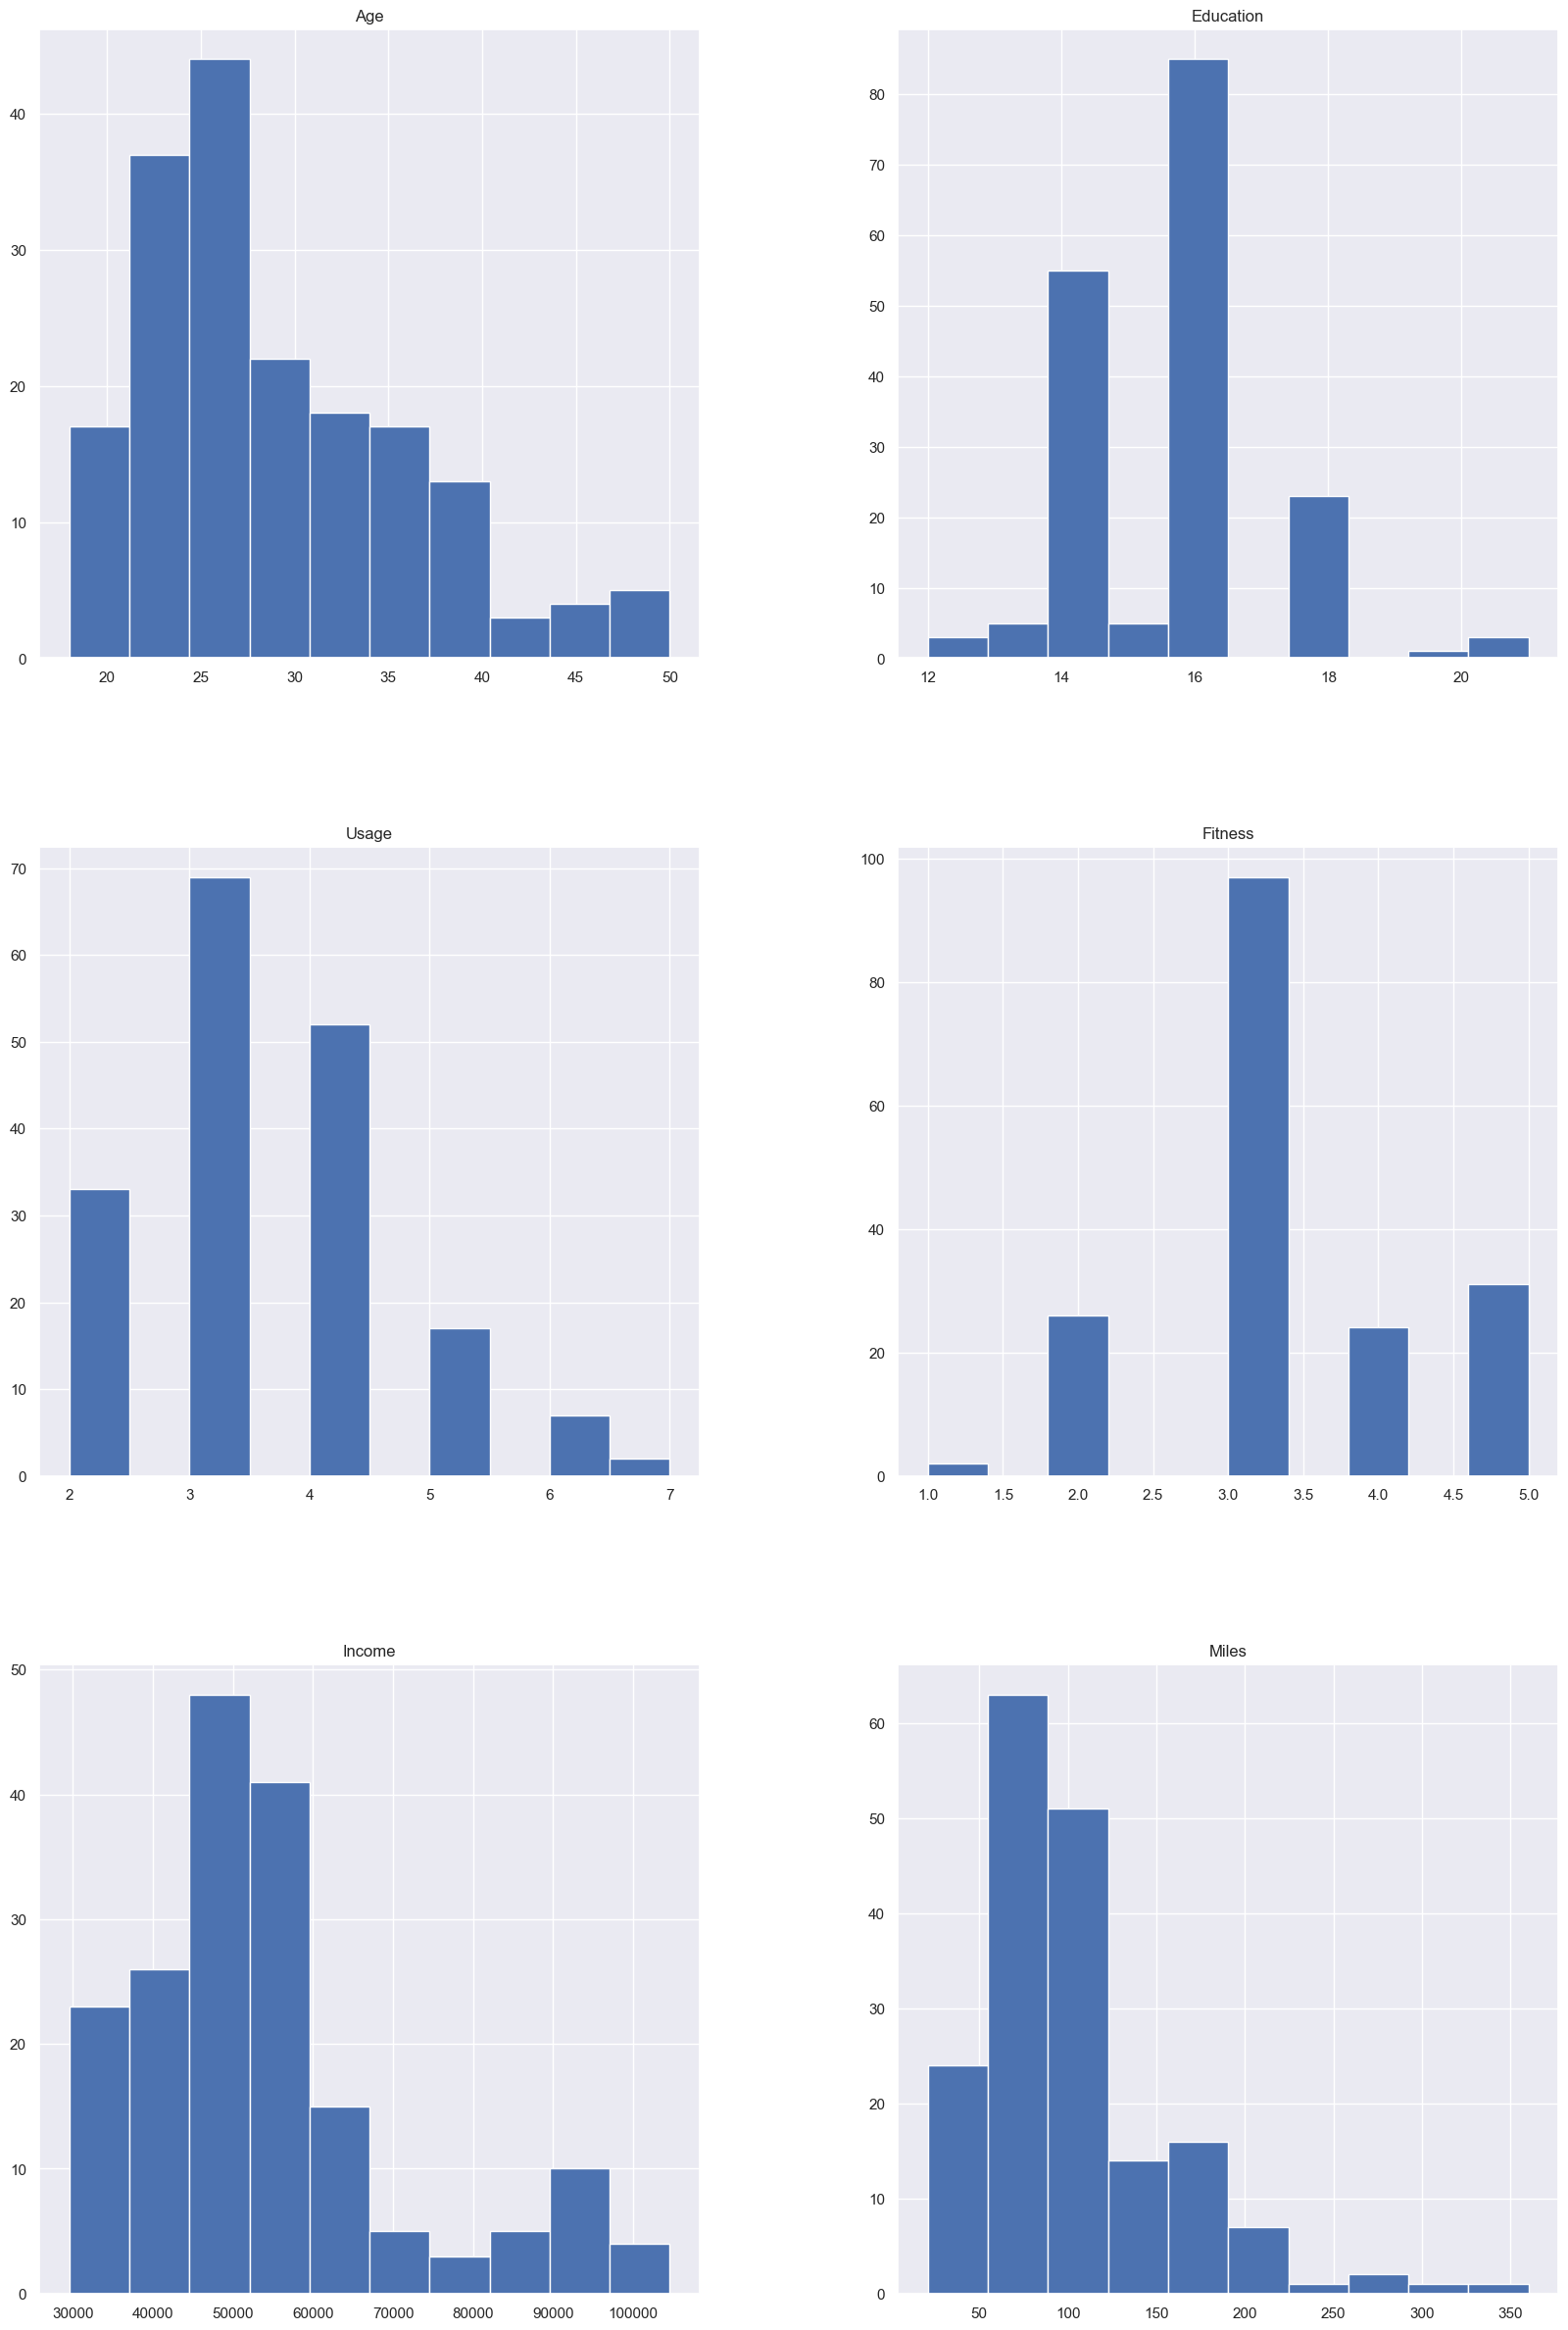

In [119]:
mydata.hist(figsize=(20,30)) # 20,30 are just figure size

<Axes: xlabel='Gender', ylabel='Age'>

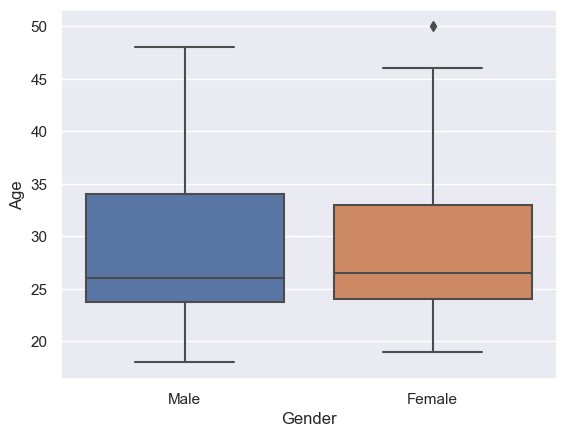

In [120]:
sns.boxplot(x = "Gender", y = "Age",  data = mydata)

In [121]:
pd.crosstab(mydata['Product'], mydata['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<Axes: xlabel='Product', ylabel='count'>

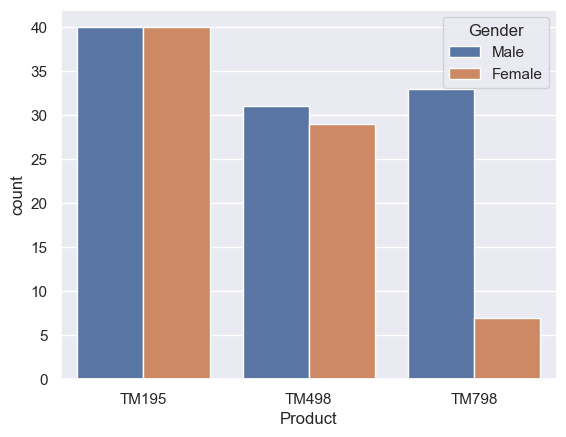

In [122]:
sns.countplot(x= "Product", hue = "Gender", data=mydata)

In [123]:
pd.pivot_table(mydata, index=['Product', 'Gender'], columns=['MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [124]:
pd.pivot_table(mydata, 'Income', index=['Product', 'Gender'], columns = ['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [125]:
pd.pivot_table(mydata, 'Miles', index=['Product', 'Gender'], columns = ['MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

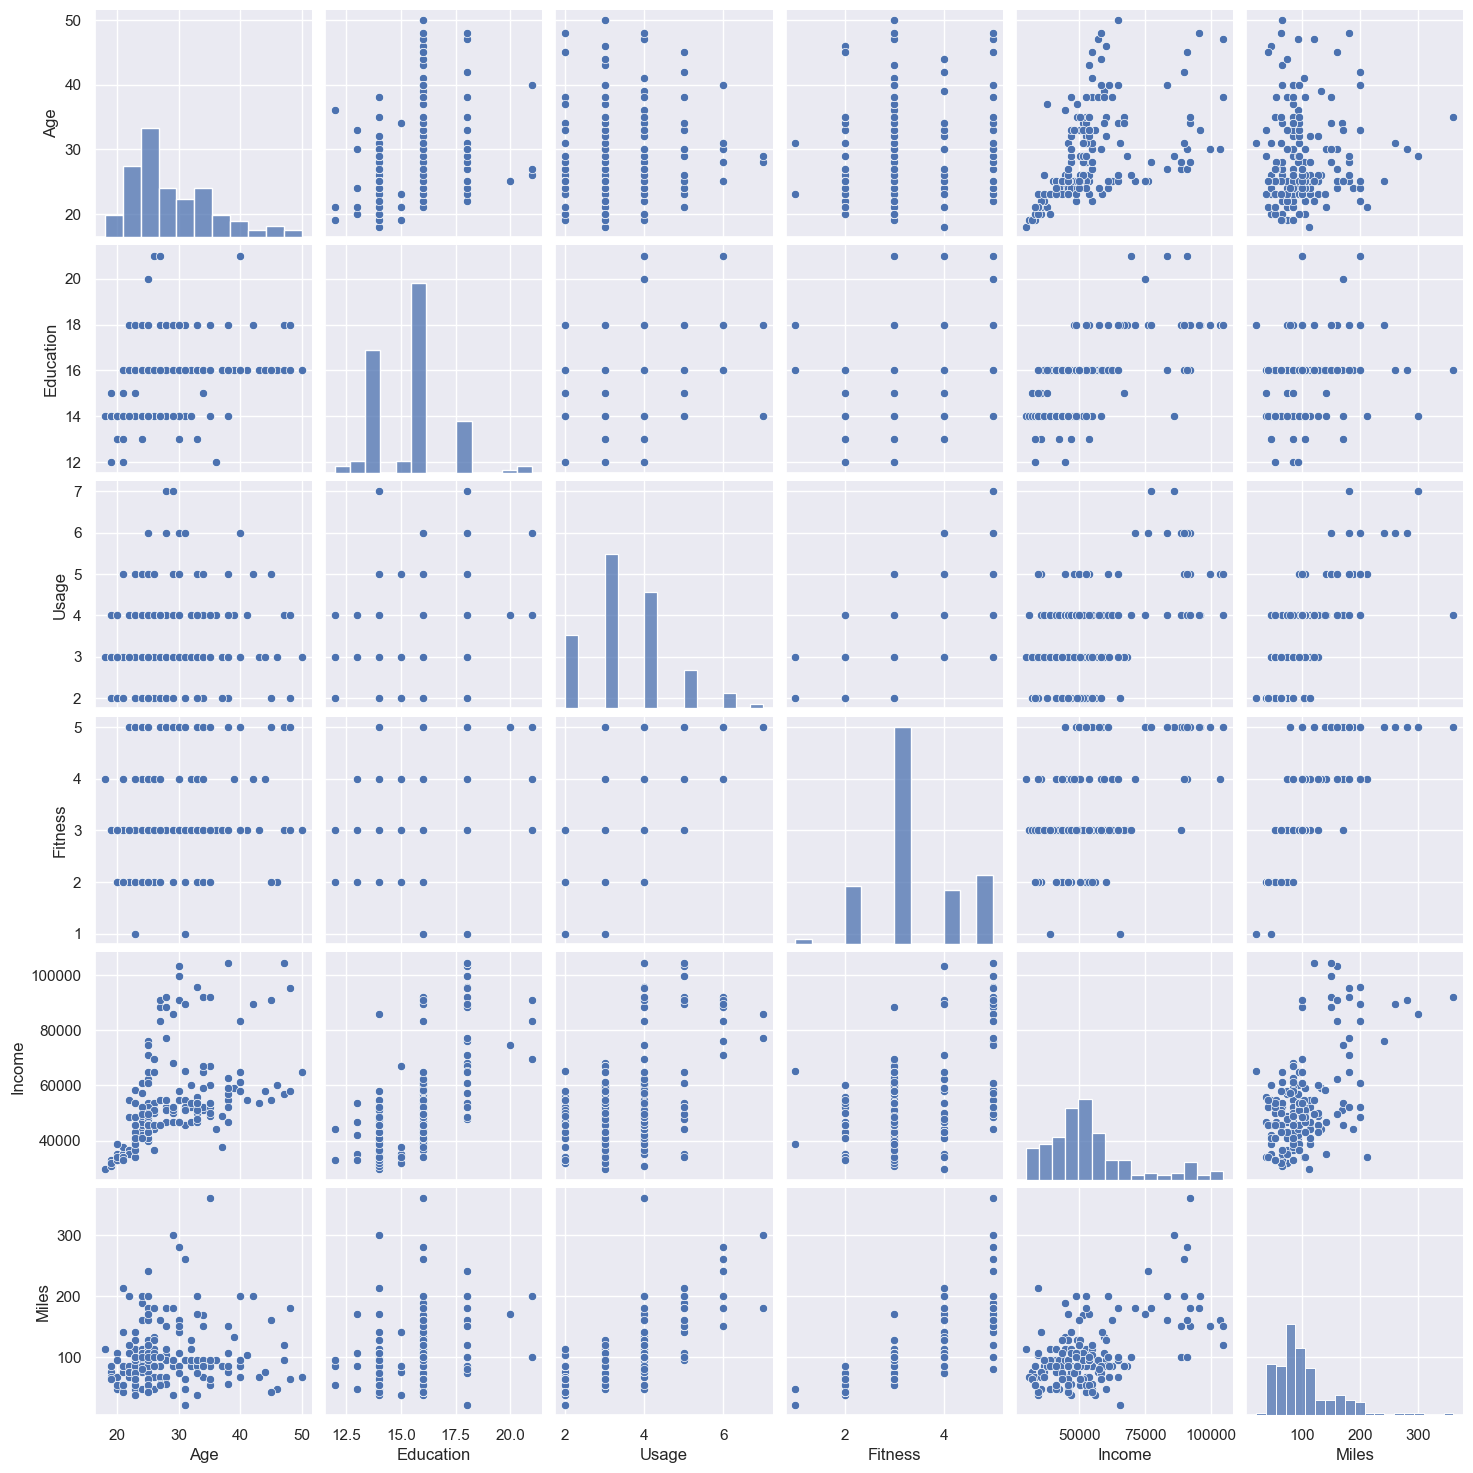

In [126]:
sns.pairplot(mydata)

In [127]:
mydata['Age'].std()

6.943498135399795

C:\Users\ajeet\AppData\Local\Temp\ipykernel_12192\4147979795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((mydata)['Age'])


<Axes: xlabel='Age', ylabel='Density'>

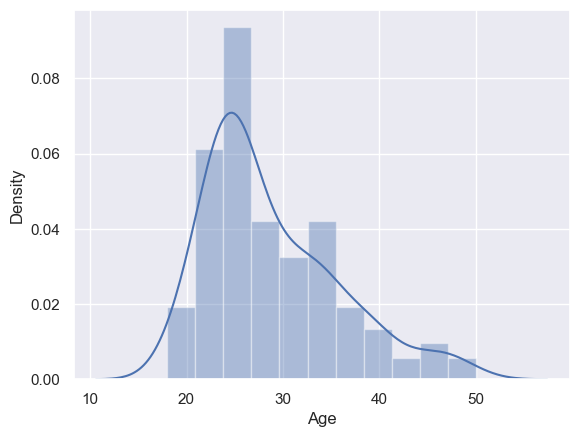

In [128]:
sns.distplot((mydata)['Age'])

array([[<Axes: title={'center': 'TM195'}>,
        <Axes: title={'center': 'TM498'}>],
       [<Axes: title={'center': 'TM798'}>, <Axes: >]], dtype=object)

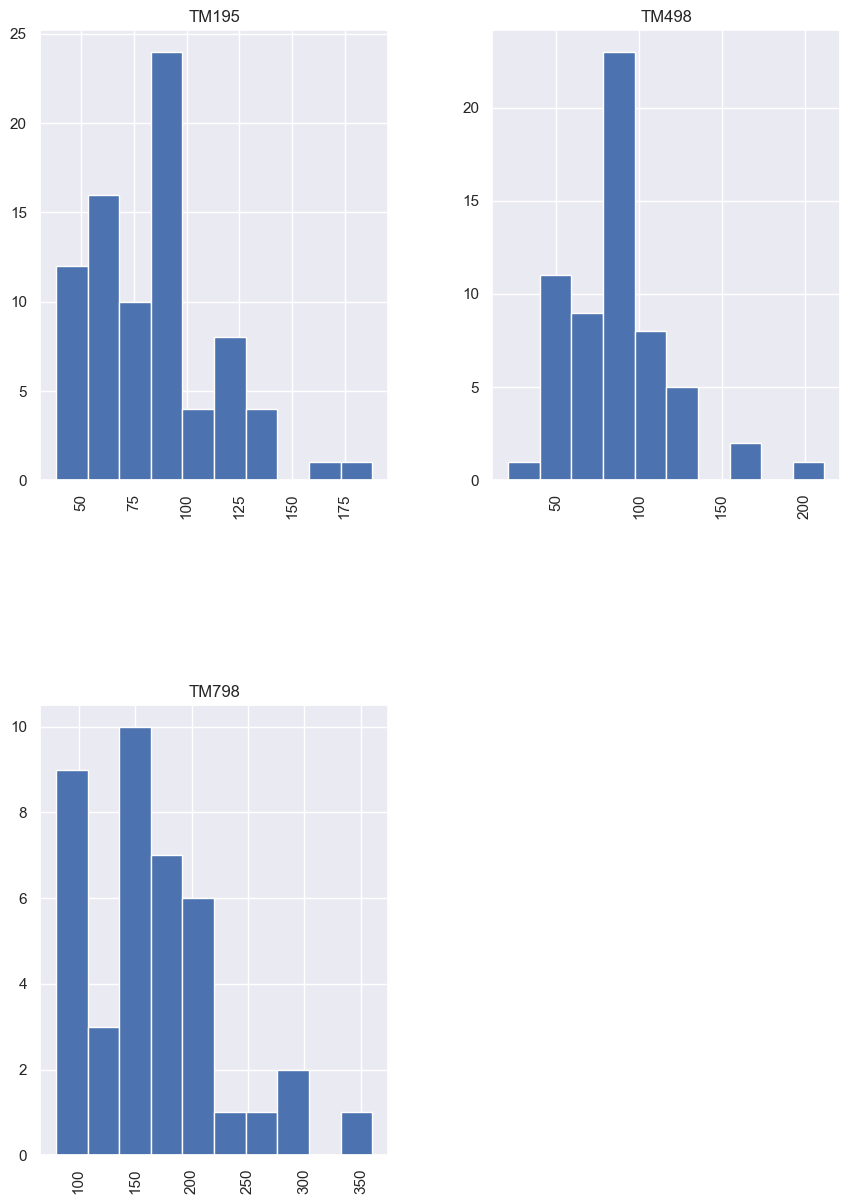

In [129]:
mydata.hist(by = 'Product', column = 'Miles', figsize=(10,15))

In [130]:
pd.crosstab(mydata['Usage'], mydata['Fitness'])

Fitness,1,2,3,4,5
Usage,,,,,
2,1,14,18,0,0
3,1,10,47,10,1
4,0,2,30,7,13
5,0,0,2,6,9
6,0,0,0,1,6
7,0,0,0,0,2


In [131]:
# SImple linear regression
#LoAD function from sklearn
from sklearn import linear_model
    
#create linear reg object
regr = linear_model.LinearRegression()

y= mydata['Miles']
x= mydata[['Usage', 'Fitness']]

regr.fit(x,y)

LinearRegression()

In [132]:
regr.coef_

array([20.21486334, 27.20649954])

In [133]:
regr.intercept_

-56.74288178464862

In [134]:
# now it has created the LINEAR EQ.
#MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness

In [135]:
#PRobability.

In [136]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

'''Question- A bank issues credit cards to customer under scheme the master card. Based on the past data, the bank has found that
60% of all accounts pay on the time following the bill. If a sample of 7 accounts is selected at random from the current 
database, construct the binomial probabitlty distribution of accounts paying on time. '''

In [137]:
n = 7
p = .6
k= np.arange(0,8)
k

array([0, 1, 2, 3, 4, 5, 6, 7])

In [138]:
binomial = stats.binom.pmf(k,n,p)

In [139]:
binomial

array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368, 0.0279936])

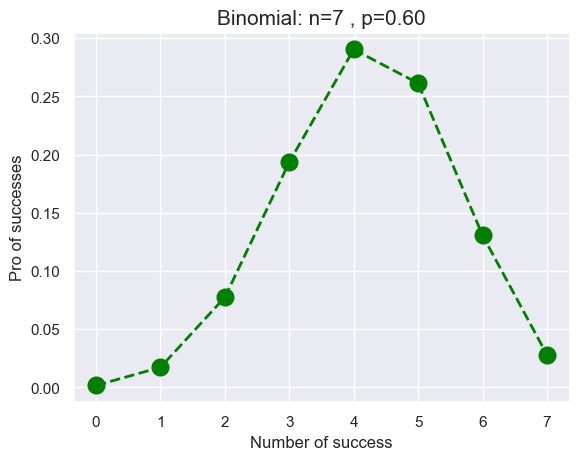

In [140]:
plt.plot(k,binomial, color='green', marker='o', linestyle='dashed', linewidth='2', markersize=12)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of success')
plt.ylabel('Pro of successes')
plt.show()

In [141]:
# UPCOMING POISSON DISTRIBUTION

In [142]:
'''If on an average, 6 customers arrive every two minutes at a bank during busy hours of working 
a) what is the pro that exactly four customers arrive in given minute
b) what is the probablity that more than three customers will arrive in a given minute'''


'If on an average, 6 customers arrive every two minutes at a bank during busy hours of working \na) what is the pro that exactly four customers arrive in given minute\nb) what is the probablity that more than three customers will arrive in a given minute'

In [143]:
rate = 3
n = np.arange(0,20)
poisson = stats.poisson.pmf(n,rate)
poisson

array([4.97870684e-02, 1.49361205e-01, 2.24041808e-01, 2.24041808e-01,
       1.68031356e-01, 1.00818813e-01, 5.04094067e-02, 2.16040315e-02,
       8.10151179e-03, 2.70050393e-03, 8.10151179e-04, 2.20950322e-04,
       5.52375804e-05, 1.27471339e-05, 2.73152870e-06, 5.46305740e-07,
       1.02432326e-07, 1.80762929e-08, 3.01271548e-09, 4.75691918e-10])

<function matplotlib.pyplot.show(close=None, block=None)>

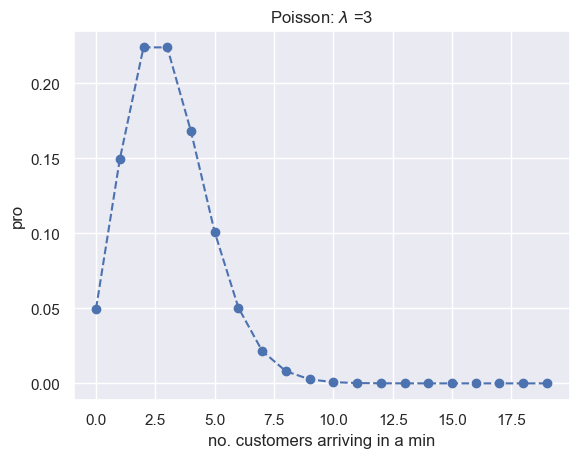

In [144]:
plt.plot(n,poisson, 'o--')
plt.title('Poisson: $\lambda$ =%i' % rate)
plt.xlabel('no. customers arriving in a min')
plt.ylabel('pro')
plt.show

In [145]:
# CALCULATING Z SCORE/VALUE

Problem Statement


The mean weight of a morning breakfast cereal pack is 0.295 kg with a standard deviation of 0.025 kg. The random variable weight of the pack follows a normal distribution.

a)What is the probability that the pack weighs less than 0.280 kg?

b)What is the probability that the pack weighs more than 0.350 kg?

c)What is the probability that the pack weighs between 0.260 kg to 0.340 kg?

In [146]:
Z = (.280-.295)/.025
Z

-0.5999999999999983

In [147]:
#CALCULATING AREA UNDER THAT Z SCORE 

stats.norm.cdf(Z)

#cdf= cumalative distribution function


0.2742531177500741

In [148]:
#if you dont want to use zscore then go directly....  .280 = x, loc = mean,  scale = SD

stats.norm.cdf(.280,loc=.295,scale=.025)


0.2742531177500741

In [149]:
# the probablity area in right is calculated as (1-pro to the left)

1-stats.norm.cdf(.280,loc=.295,scale=.025)
    

0.7257468822499259

In [150]:
#between the .340 and .260 

stats.norm.cdf(.340,loc=.295,scale=.025)-stats.norm.cdf(.260,loc=.295,scale=.025)

0.8833130216533032

In [151]:
# prob between 1,2,3  SD of the mean

stats.norm.cdf(1)-stats.norm.cdf(-1)
stats.norm.cdf(2)-stats.norm.cdf(-2)
stats.norm.cdf(3)-stats.norm.cdf(-3)

0.9973002039367398

In [152]:
stats.norm.cdf(2)-stats.norm.cdf(-2)
# How come SD is working in bracket when eariler Z score was also working in same bracket


0.9544997361036416

In [153]:
stats.norm.cdf(3)-stats.norm.cdf(-3)


0.9973002039367398

In [154]:
####We will practice this again as we are here DAYS LATER...!

'Question- A bank issues credit cards to customer under scheme the master card. Based on the past data, the bank has found that\n60% of all accounts pay on the time following the bill. If a sample of 7 accounts is selected at random from the current \ndatabase, construct the binomial probabitlty distribution of accounts paying on time. '

In [155]:
n = 7
p = .6
k = np.arange(0,8)


In [156]:
k = np.arange(0,8)
k

array([0, 1, 2, 3, 4, 5, 6, 7])

In [157]:
binomial =  stats.binom.pmf(k,n,p)

In [158]:
binomial

array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368, 0.0279936])

Text(0, 0.5, 'Number of trials')

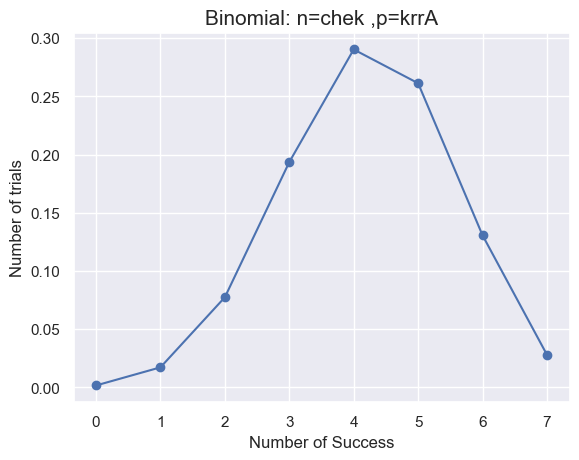

In [159]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial: n=chek ,p=krrA', fontsize=15)
plt.xlabel('Number of Success')
plt.ylabel('Number of trials')

#    Hypothesis Testing


In [160]:
# Daily intake of energy in kj for 11 women
daily_intake = np.array([5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770])
daily_intake.mean()

6753.636363636364

In [161]:
# one sample t test 
# null hypothesis: expected value = 7725
t_statistics, p_value = ttest_1samp(daily_intake, 7725)
print(t_statistics,p_value)
# 6753 is 2.8 standard deviation from mean,while .018 is percentage of chances

-2.8207540608310193 0.018137235176105812


In [162]:
# THIS MEANS THE POPULATION MEAN IS UNLIKELY TO BE 7725 IF THESE 11 WOMEN ARE FROM THAT SAMPLE, IF P VALUE IS LESS 
# SIGNIFICANCE LEVEL IN THIS CASE IS 1.8% AND 5% RESPECTIVELY WE REJECT THE NULL HYPOTHESIS....

# T-stats normalise the difference between numbers in distribution to standard errors


## Following is the data of consumers in insurance company, Data has been throughly analysed with the help of APPLIED STATISTICS CONCEPTS.

CASE STUDY - INSURANCE.CSV
CONCETPS USED - APPLIED STATISTICS
LANGUAGE - PYTHON
IMPORTS - MULTIPLE, PLEASE FIND IN NEXT CELL.

#### Before we get into concepts and codes applied, i would like to share my analysis of data below in LayMan terms

- The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column)
- Data looks legit as all the statistics seem reasonable
- Looking at the age column, data looks representative of the true age distribution of the adult population
- Very few people have more than 2 children. 75% of the people have 2 or less children
- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost     more to get rid of
- bmi looks quiet normally distributed
- Age seems be be distributed quiet uniformly
- As seen in the previous step, charges are highly skewed
- Skew of bmi is very less as seen in the previous step
- age is uniformly distributed and there's hardly any skew
- charges are highly skewed
- bmi has a few extreme values
- charges as it is highly skewed, there are quiet a lot of extreme values
- There are a lot more non-smokers than there are smokers in the data
- Instances are distributed evenly accross all regions
- Gender is also distributed evenly
- Most instances have less than 2 children and very few have 4 or 5 children
- The only obvious correlation of 'charges' is with 'smoker'
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged       more than the younger ones
- STD is 46.66 meanwhile probabilty that charges DO NOT depends on smoking is (8.271435842179102e-283) which lies outsite       confidence interval which was 95% (suggestion that it DOES not depend) or in other words charges heavily depends on if person  smokes or not..  
- Bmi doesnt depends on gender as a p_value (0.0) < 0.05
- Gender has an effect on smoking habits as the p_value (0.007) < 0.05
- Region has no effect on smoking habits as the p_value (0.062) > 0.05



In [163]:
sns.set()

In [164]:
df = pd.read_csv('insurance.csv')

In [165]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [167]:
df.isnull().apply(pd.value_counts) #NotNullcount

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [168]:
df.describe().T  #Transposed

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Text(0.5, 0, 'charges')

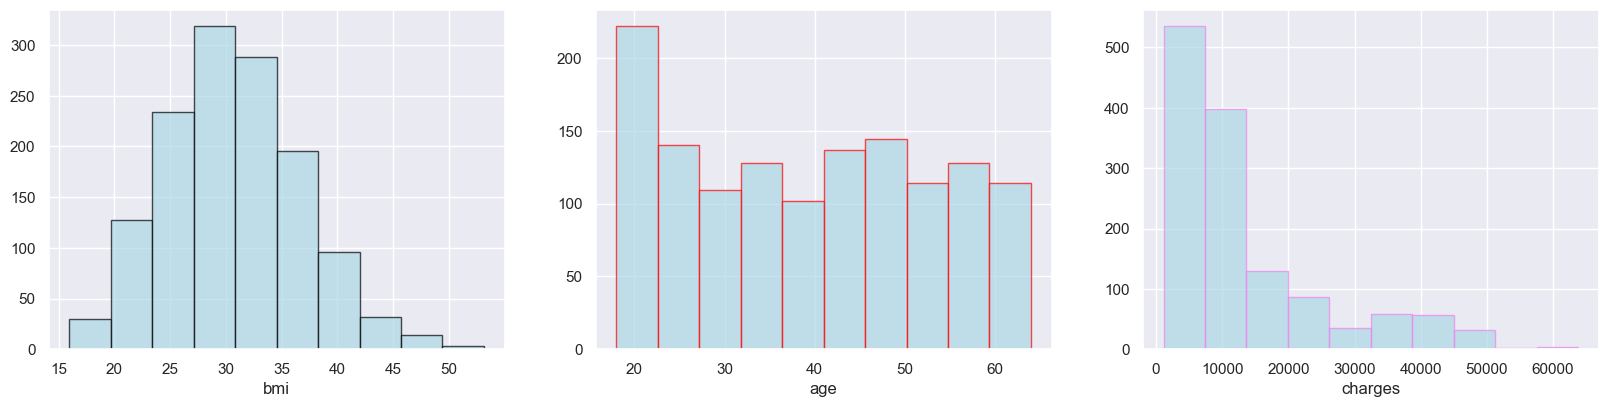

In [169]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')


plt.subplot(3,3,2)
plt.hist(df.age, color = 'lightblue', edgecolor = 'red', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color = 'lightblue', edgecolor = 'violet', alpha = 0.7)
plt.xlabel('charges')


In [170]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

# Measures of Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


<Axes: xlabel='charges'>

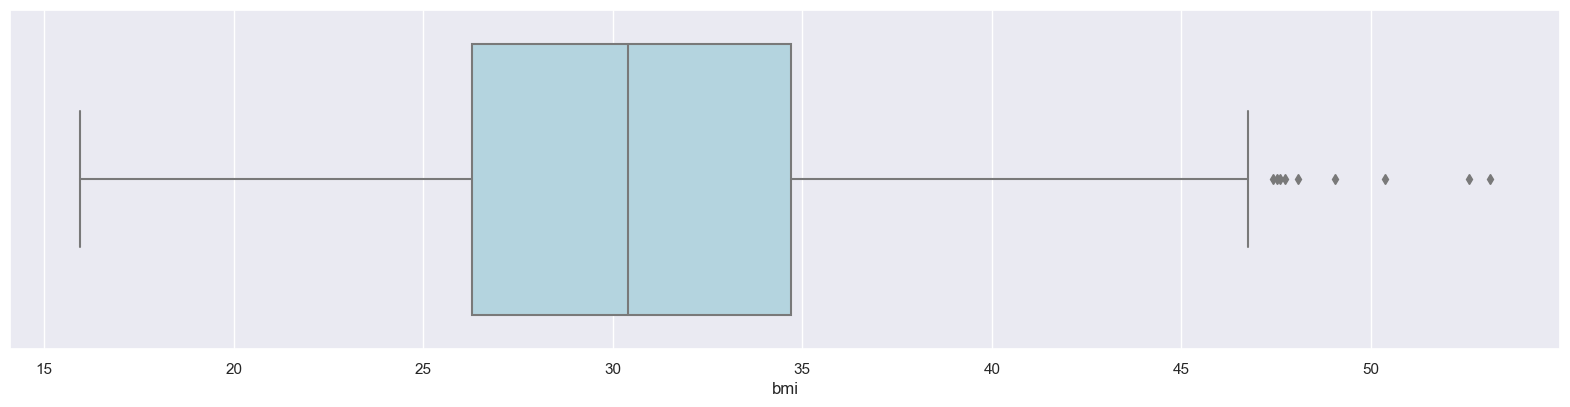

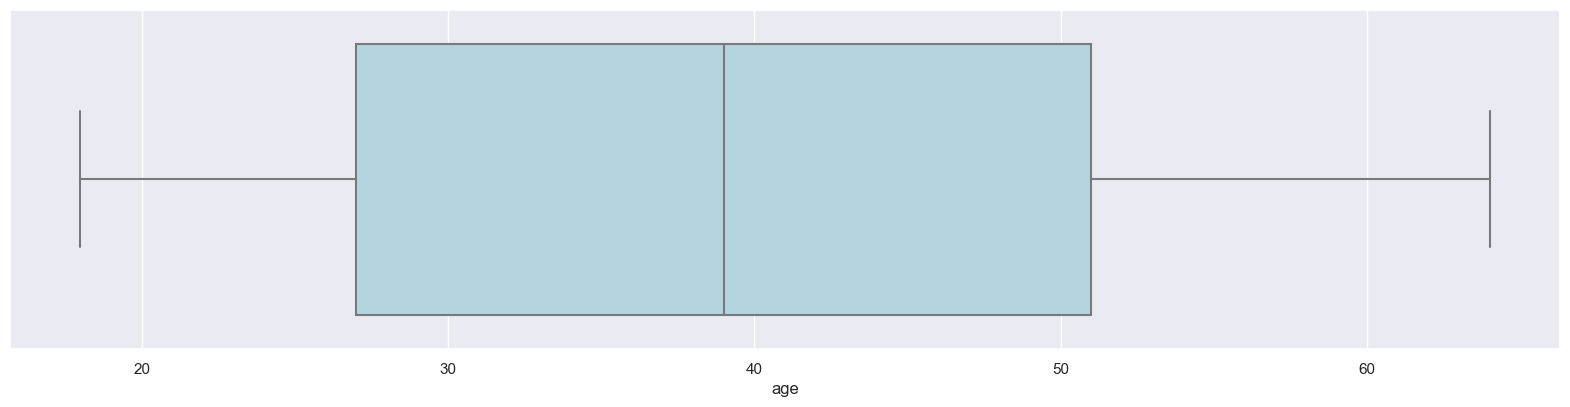

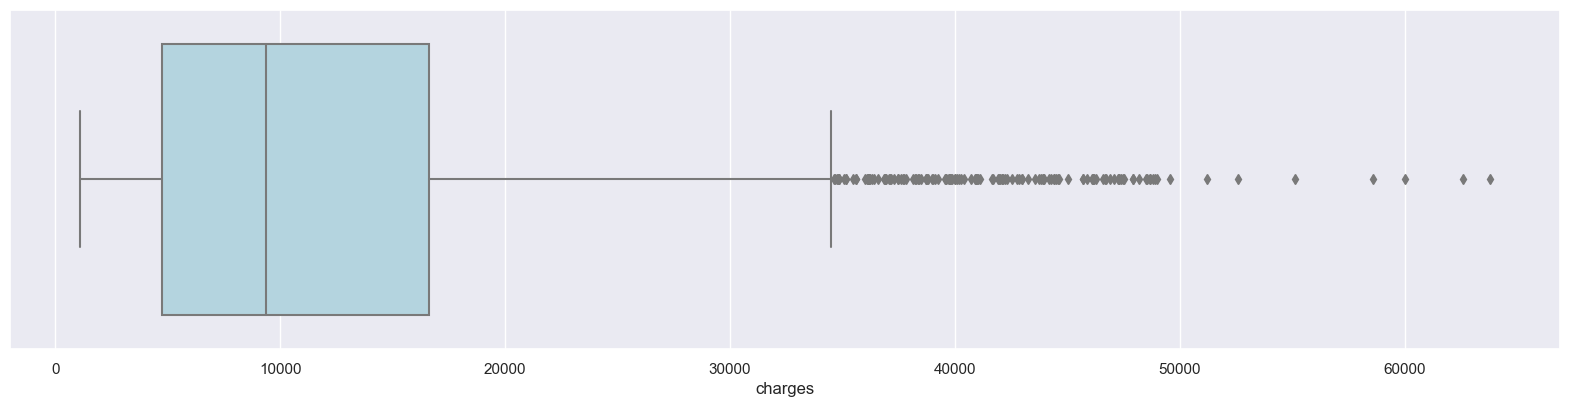

In [171]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color = 'lightblue')

plt.figure(figsize = (20,15))
plt.subplot(3,1,2)
sns.boxplot(x=df.age, color = 'lightblue')

plt.figure(figsize = (20,15))
plt.subplot(3,1,3)
sns.boxplot(x=df.charges, color = 'lightblue')

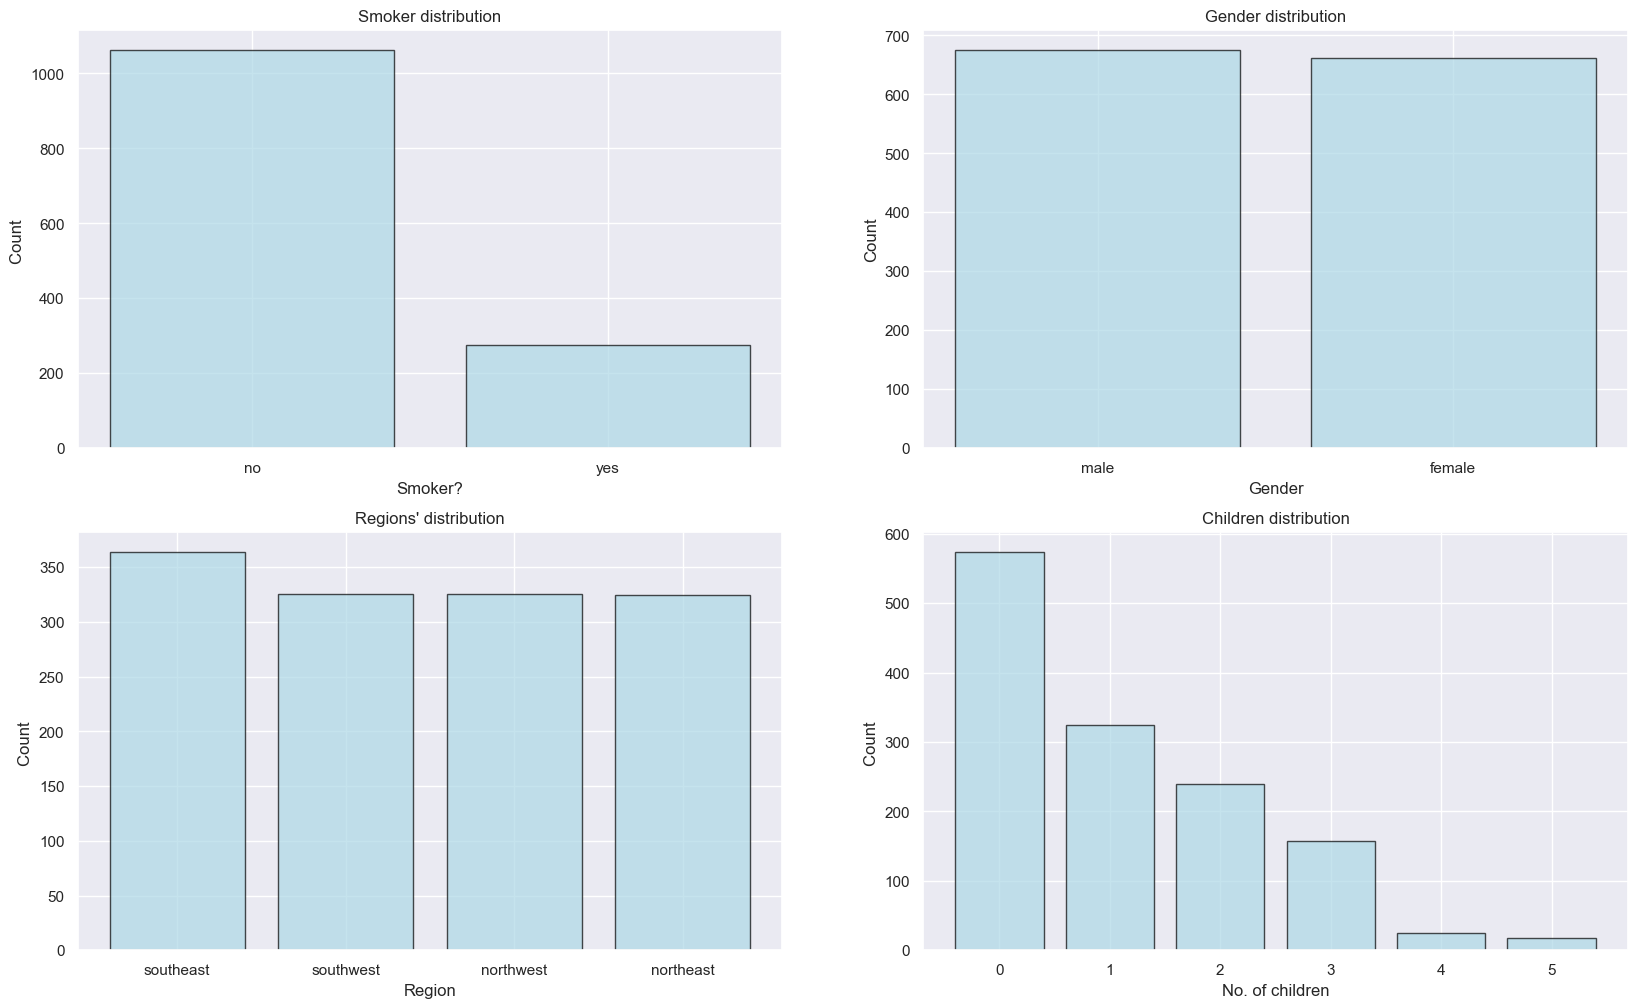

In [172]:
plt.figure(figsize=(20,25))

# Very IMPORTANT CODES


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black', alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')


x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts()[j] for j in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()



In [173]:
copy.deepcopy(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\ajeet\AppData\Local\Temp\ipykernel_12192\85776818.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[:,['sex', 'smoker', 'region' ]]= df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)


<function matplotlib.pyplot.show(close=None, block=None)>

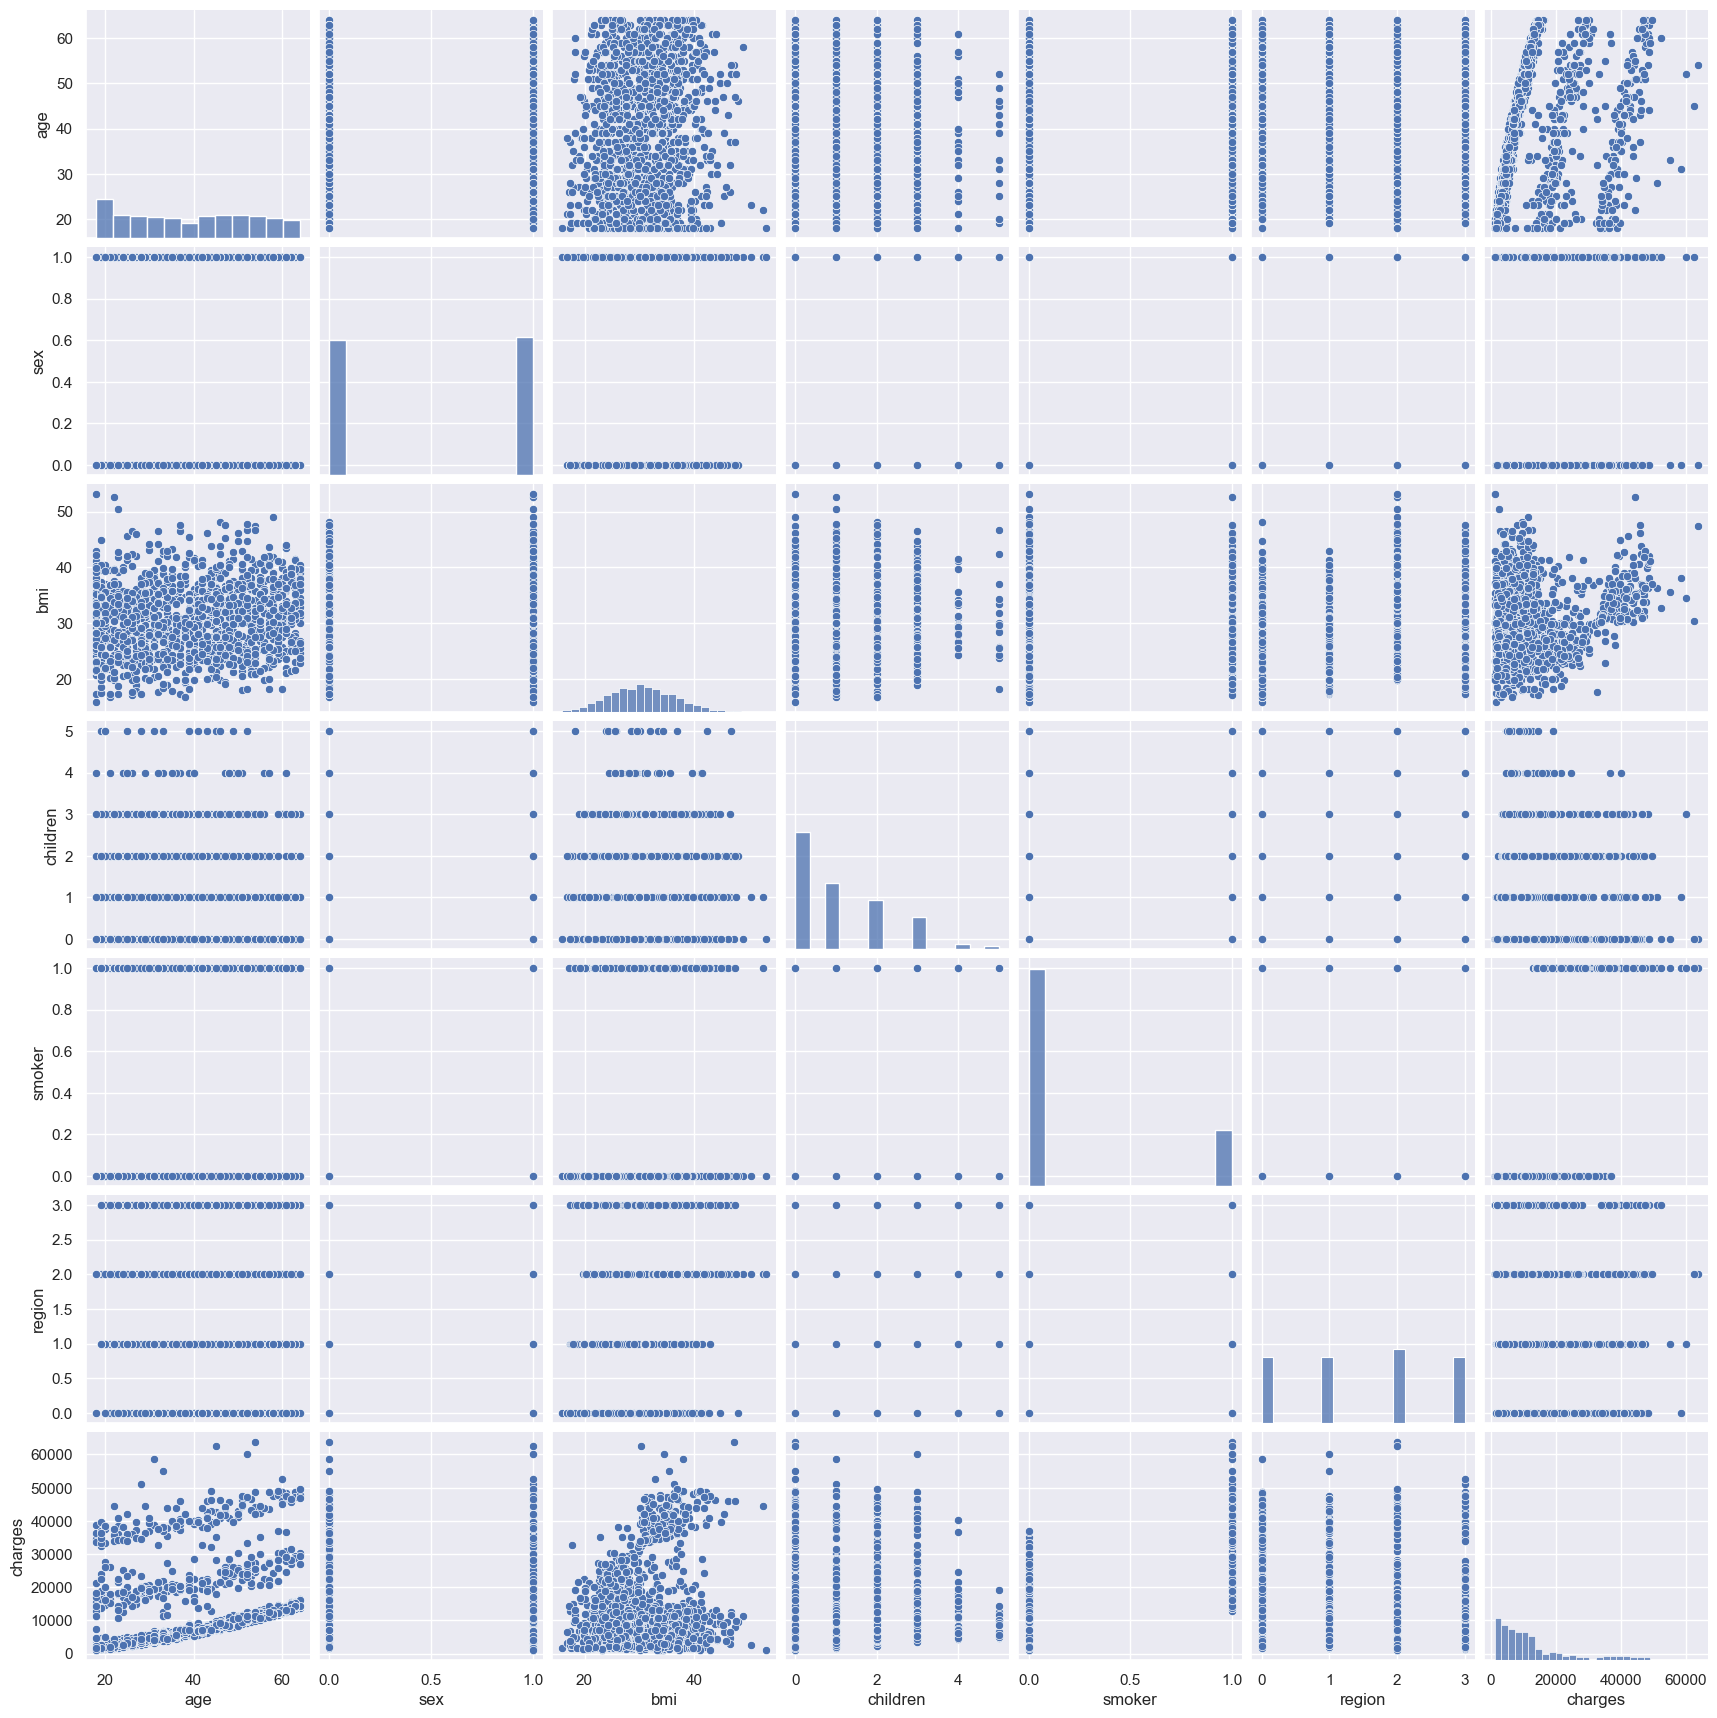

In [174]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
#Label encode converts every categorical data into quantitative, with this you YES: 1 and NO: 2.
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region' ]]= df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

sns.pairplot(df_encoded)
plt.show

In [175]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [176]:
# T-test to check dependency of charges on smoking

Ho = "Charges of smoker and non-smoker are same"
Ha = "Charges of smoker and non-smoker are not same"
    
x = np.array(df[df.smoker == 'yes'].charges)
y = np.array(df[df.smoker == 'no'].charges)

t, p_value = stats.ttest_ind(x,y, axis = 0) 
print(t, p_value)


if p_value < 0.05: # Setting our significance level at 5%
    print (f'{Ha} as the ({p_value}) < 0.05')
else:
    print (f'{Ho} as the ({p_value}) > 0.05' )
            
        
#STD is 46.66 meanwhile probabilty that charges DO NOT depends on smoking is (8.271435842179102e-283) which 
#lies outsite confidence interval which was 95% (suggestion that it DOES not depend) or in other words charges
# heavily depends on if person smokes or not..        
        
    
        


46.66492117272371 8.271435842179102e-283
Charges of smoker and non-smoker are not same as the (8.271435842179102e-283) < 0.05


#### Does BMI of males differ significantly from that of the females?

In [177]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

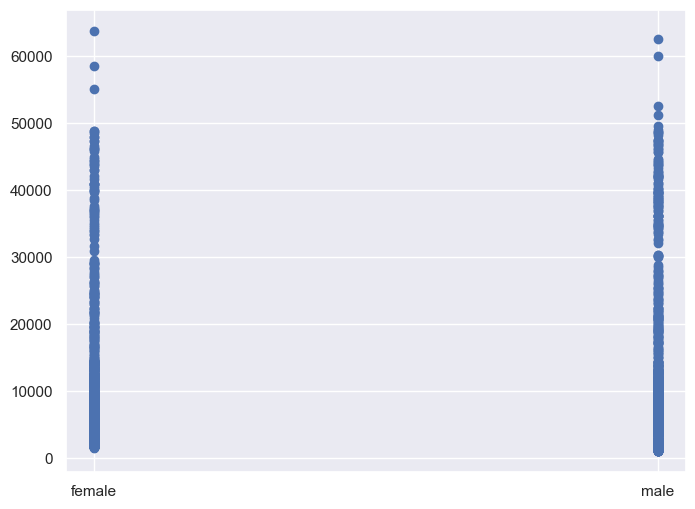

In [178]:
plt.figure(figsize = (8,6))
plt.scatter(x=  df.sex,  y =df.charges,)
plt.show()

### As we cannot say anything about relation of sex and bmi so we will go for even accurate method i.e T-test

In [179]:
Ho = "Bmi depends on gender"
Ha = "Bmi doesnt depends on gender"

x = np.array(df[df.sex == 'male'].bmi)
y = np.array(df[df.sex == 'female'].bmi)

t, p_value = stats.ttest_ind(x,y, axis = 0) 
print(t, p_value)

if p_value < 0.05:
    print(f'{Ha} as a p_value ({p_value.round(5)}) < 0.05')
else:
    print(f'{Ha} as a p_value ({p_value.round(5)}) < 0.05')

1.696752635752224 0.08997637178984932
Bmi doesnt depends on gender as a p_value (0.08998) < 0.05


In [180]:
 # chi square test to check if smoking habits are different for different genders

Ho = "Gender has no effect on smoking habits"
Ha = 'Gender has an effect on smoking habits'

crosstab = pd.crosstab(df['sex'], df['smoker'])
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < .05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


In [181]:
 # chi square test to check if smoking habits are different for different regions

Ho = "Region has no effect on smoking habits"
Ha = 'region has an effect on smoking habits'

crosstab = pd.crosstab(df['region'], df['smoker'])
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < .05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Region has no effect on smoking habits as the p_value (0.062) > 0.05


In [182]:
# Testing to check if the bmi of the females differs with number of children thhey have, As here t-test cannot be applied we will go for A-Nova test.
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0].bmi
one = female_df[female_df.children == 1].bmi
two = female_df[female_df.children == 2].bmi


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
